In [44]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

def iterate_map(f, x_0, n):
    trajectory = np.zeros(n + 1)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        trajectory[i] = f(trajectory[i-1])
    
    return trajectory

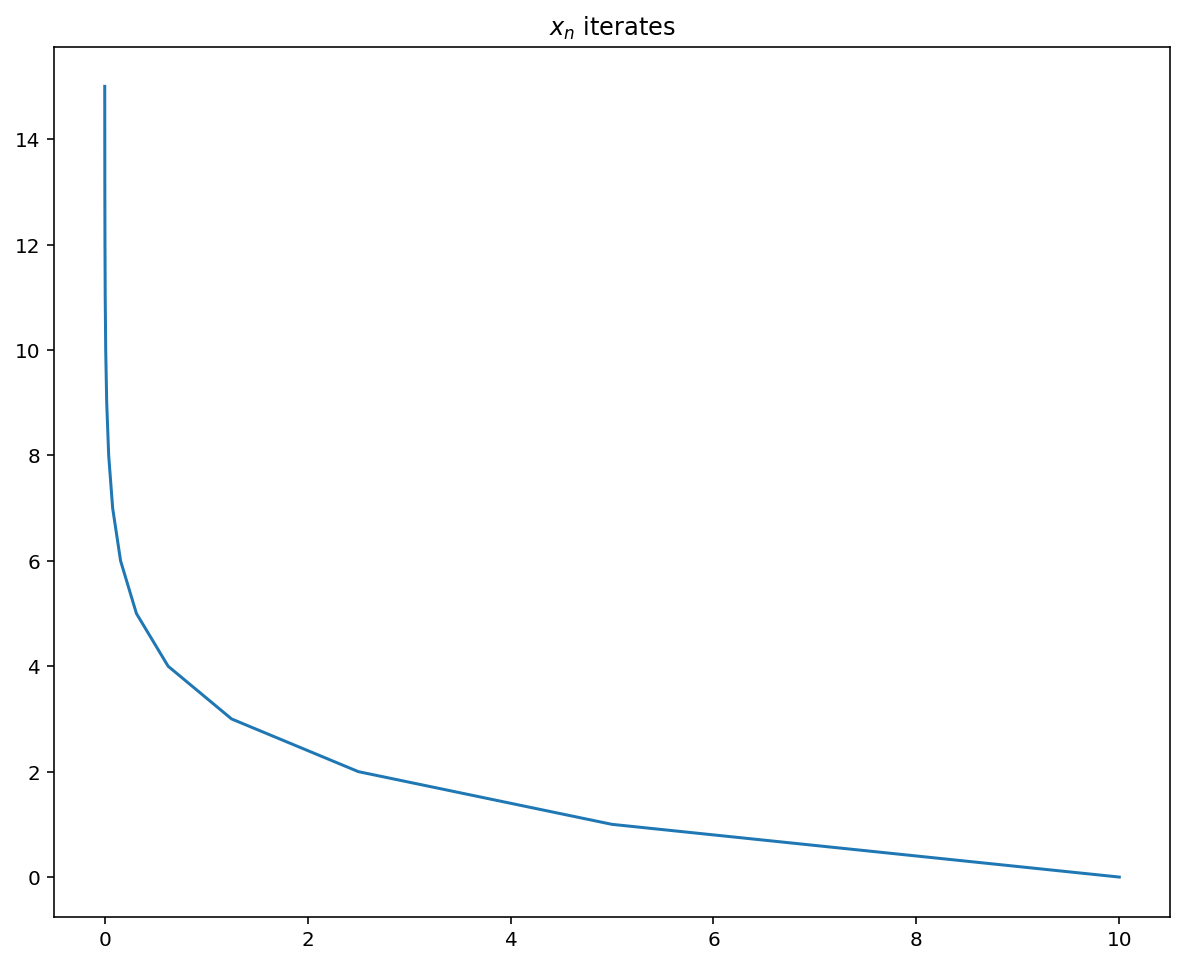

In [53]:
half_map = lambda x: x / 2

trajectory = iterate_map(half_map, 10, 15)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(trajectory, np.arange(16))

ax.set_title(r'$x_n$ iterates')
fig.show()

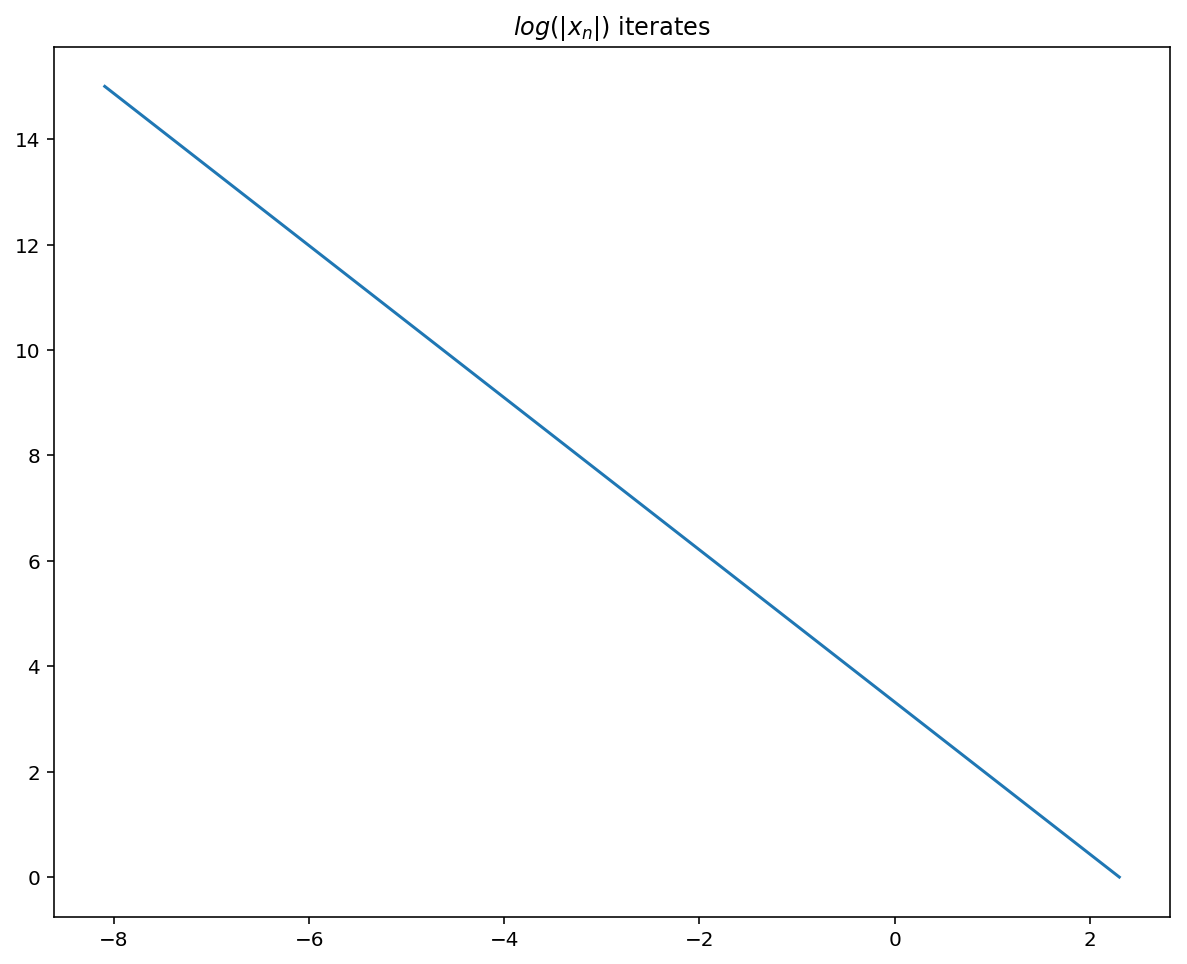

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.log(trajectory), np.arange(16))
ax.set_title(r'$log(|x_n|)$ iterates')
fig.show()

In [66]:
f = lambda x: x * (0.5 + x)

def f_deriv(x):
    return 0.5 + 2 * x

def lyapunov_exponent(fn, deriv, val, num_iterates=10**6):
    trajectory = iterate_map(fn, val, num_iterates)
    return np.sum(np.log(np.abs(f_deriv(trajectory)))) / num_iterates

print(lyapunov_exponent(f, f_deriv, 1/4))
print(lyapunov_exponent(f, f_deriv, 3/8))
print(lyapunov_exponent(f, f_deriv, 31/64))

-0.693145545034783
-0.6931435155446732
-0.6931377686947378
